<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Preprocessing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Missing values

## Récupération datasets

In [2]:
import pandas as pd
import missingno as msno
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [3]:
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv
     

--2023-05-15 12:13:04--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-15 12:13:05 (15.4 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-15 12:13:05--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [4]:


df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')
     


# On détermine les colonnes qui ont des données manquantes


In [5]:
df_test_inputs.columns[df_test_inputs.isnull().any()].tolist()


['OP100_Capuchon_insertion_mesure']

In [6]:
df_training_inputs.columns[df_training_inputs.isnull().any()].tolist()

['OP100_Capuchon_insertion_mesure']

In [7]:
df_training_output.columns[df_training_output.isnull().any()].tolist()

[]

In [36]:
df_training_inputs.shape

(34515, 14)

In [ ]:

print("NaN of OP100_Capuchon_insertion_mesure in training = ", df_training_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )
print("NaN of OP100_Capuchon_insertion_mesure in test = ", df_test_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )

NaN of OP100_Capuchon_insertion_mesure in training =  18627
NaN of OP100_Capuchon_insertion_mesure in test =  4360


## On relie le dataset des données d'entrainement avec le label en sortie

In [26]:
df_training = pd.merge(df_training_inputs, df_training_output, on='PROC_TRACEINFO')

In [34]:
df_training = df_training.drop(columns=["PROC_TRACEINFO"])

KeyError: ignored

<Axes: >

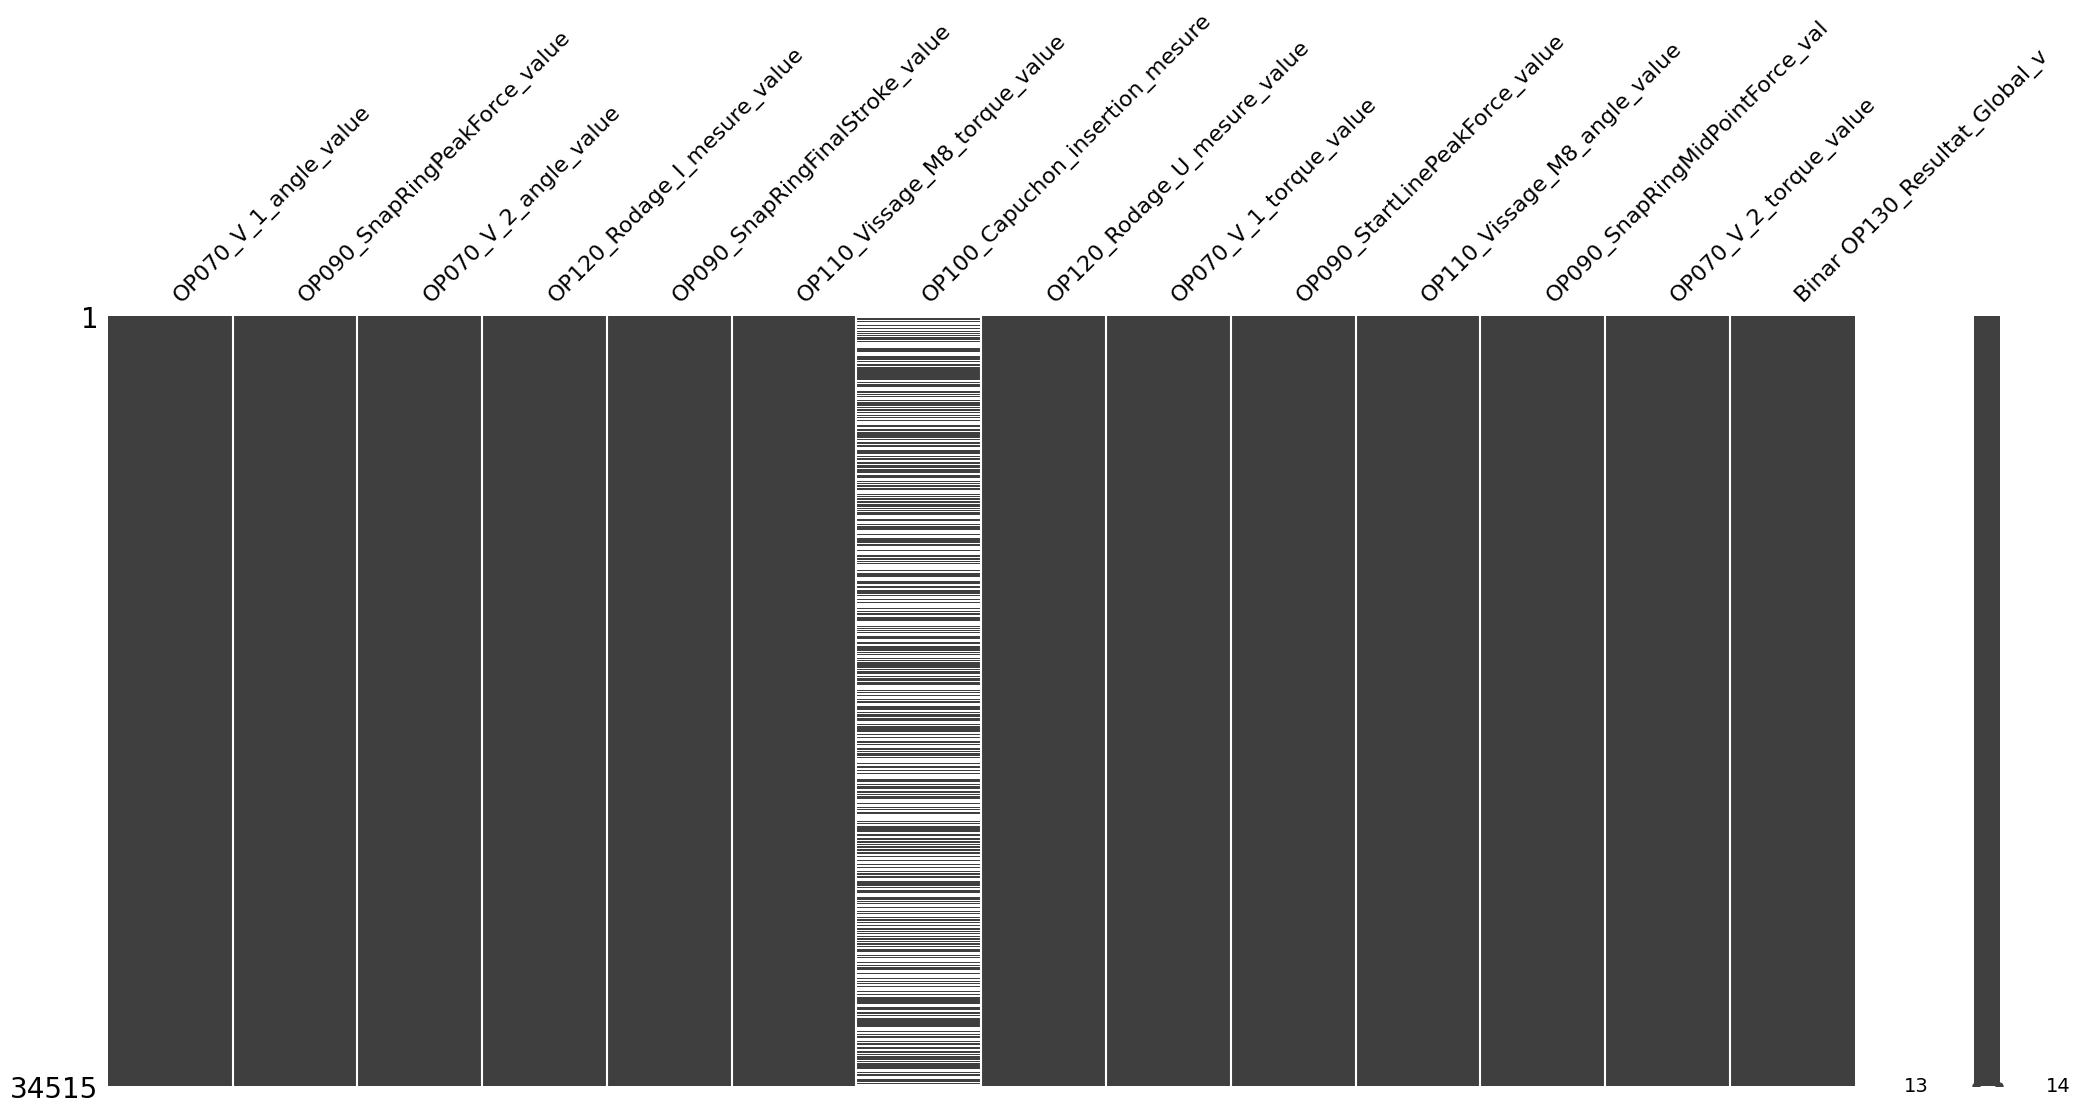

In [33]:
msno.matrix(df_training)

<Axes: >

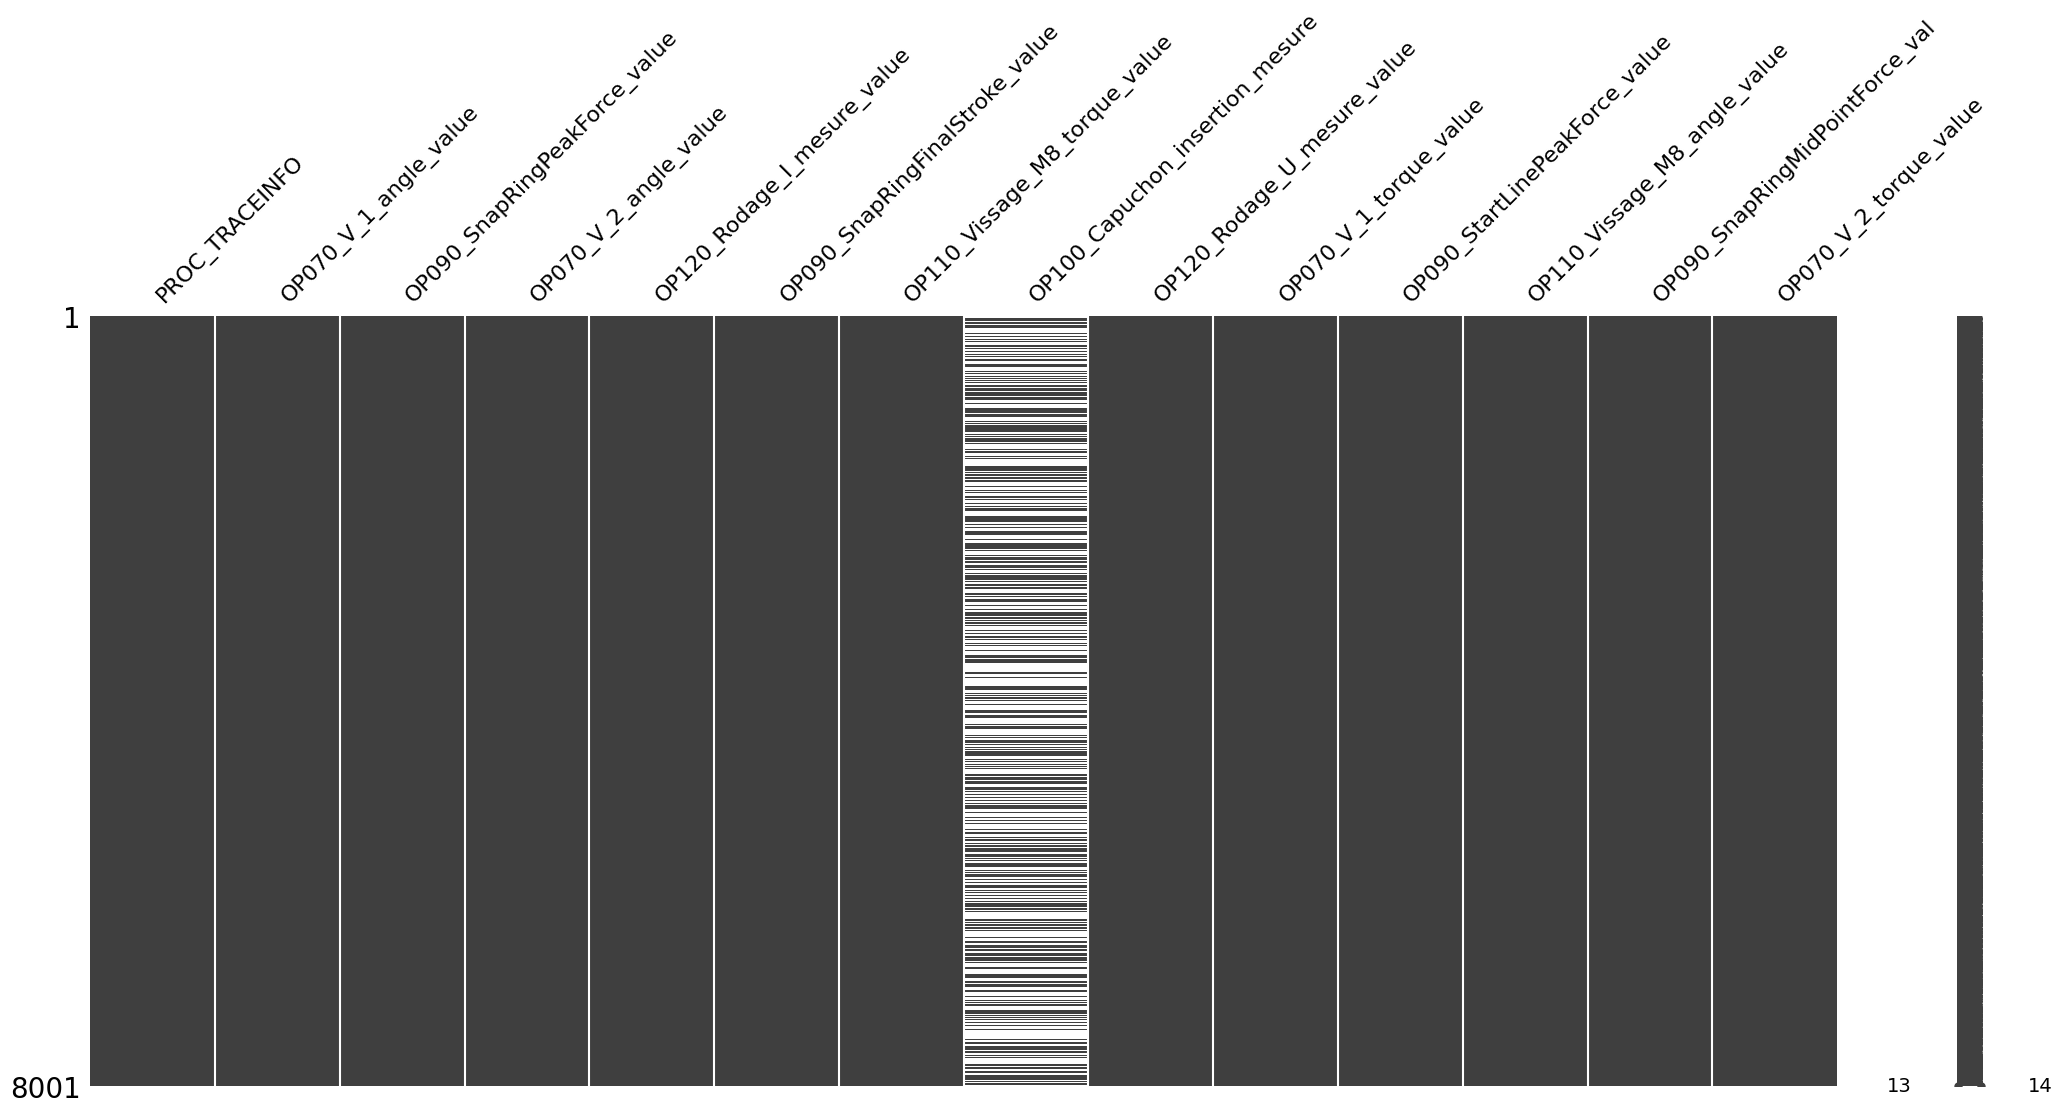

In [13]:
msno.matrix(df_test_inputs)

### Stratégie 1: Supprimer l'unique colonne avec des valeurs manquantes

In [38]:
df_training_cleaned = df_training.drop(columns=["OP100_Capuchon_insertion_mesure"])
df_test_inputs_cleaned = df_test_inputs.drop(columns=["OP100_Capuchon_insertion_mesure", "PROC_TRACEINFO"])

### Stratégie 2: Supprimer les lignes avec des valeurs manquantes

In [39]:
df_training_nonull = df_training.dropna()

#Categorical features

In [40]:
df_training_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34515 entries, 0 to 34514
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP120_Rodage_U_mesure_value      34515 non-null  float64
 7   OP070_V_1_torque_value           34515 non-null  float64
 8   OP090_StartLinePeakForce_value   34515 non-null  float64
 9   OP110_Vissage_M8_angle_value     34515 non-null  float64
 10  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 11  OP070_V_2_torque_value           34515 non-null  float64
 12  Binar OP130_Result

In [41]:
df_training_nonull.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15888 entries, 1 to 34511
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            15888 non-null  float64
 1   OP090_SnapRingPeakForce_value    15888 non-null  float64
 2   OP070_V_2_angle_value            15888 non-null  float64
 3   OP120_Rodage_I_mesure_value      15888 non-null  float64
 4   OP090_SnapRingFinalStroke_value  15888 non-null  float64
 5   OP110_Vissage_M8_torque_value    15888 non-null  float64
 6   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 7   OP120_Rodage_U_mesure_value      15888 non-null  float64
 8   OP070_V_1_torque_value           15888 non-null  float64
 9   OP090_StartLinePeakForce_value   15888 non-null  float64
 10  OP110_Vissage_M8_angle_value     15888 non-null  float64
 11  OP090_SnapRingMidPointForce_val  15888 non-null  float64
 12  OP070_V_2_torque_v

In [47]:
df_training_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PROC_TRACEINFO                 34515 non-null  object
 1   Binar OP130_Resultat_Global_v  34515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 539.4+ KB


In [46]:
df_training_cleaned.csv = df_training_cleaned.to_csv(path_or_buf="/home/deshayes/2A_TSP/Apprentissage_automatique_réseaux/AI_Valeo")

OSError: ignored

In [45]:
df_training_nonull.csv = df_training_nonull.to_csv()